In [1]:
! pip install plotly
! pip install matplotlib

'pip3' is not recognized as an internal or external command,
operable program or batch file.


In [40]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
# import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
#подключаем seaborn
import seaborn as sns

In [8]:
#импортируем данные о распределении размещенных процедур и поданных заявок на площадке РТС-тендер
df = pd.read_excel('Книга1.xlsx')
print(df.shape)

(4468, 5)


In [9]:
df.head()

,Область,Регион,ProcKol,AllKol,BlockedGuarantee
0,"Услуги и работы, связанные с научными исследов...",Хакасия,6,23,31213.30
1,"Продукция лесоводства, лесозаготовок и связанн...",Калининградская,8,10,235183.64
2,Продукты минеральные неметаллические прочие,Саха /Якутия/,23,26,496510.38
3,Услуги водного транспорта,Саха /Якутия/,11,14,576184.61
4,Продукты пищевые,Липецкая,29,386,4720522.56


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4468 entries, 0 to 4467
Data columns (total 5 columns):
Область             4468 non-null object
Регион              4468 non-null object
ProcKol             4468 non-null int64
AllKol              4468 non-null int64
BlockedGuarantee    4468 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 174.6+ KB


In [12]:
#группируем все размещенные закупки по регионам
df1 = df[[x for x in df.columns if 'ProcKol' in x] + ['Регион']]\
    .groupby('Регион').sum()
df1.head(15)

,ProcKol
Регион,
Адыгея,1
Алтай,2801
Алтайский,12958
Амурская,6222
Архангельская,333
Астраханская,868
Башкортостан,298
Белгородская,3694
Брянская,1881


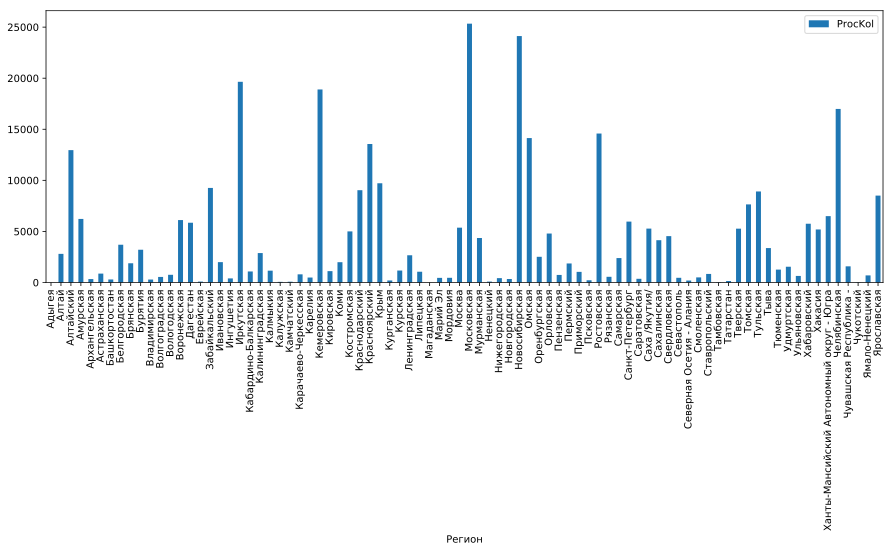

In [25]:
#строим bar char для оценки вложения каждого региона в общую долю
df1.plot(kind='bar', rot=90)

In [26]:
#смотрим общее количество заявок по региону
df1 = df[[x for x in df.columns if 'AllKol' in x] + ['Регион']]\
    .groupby('Регион').sum()
df1.head(15)

,AllKol
Регион,
Адыгея,5
Алтай,8000
Алтайский,41544
Амурская,12024
Архангельская,858
Астраханская,2368
Башкортостан,689
Белгородская,8733
Брянская,5147


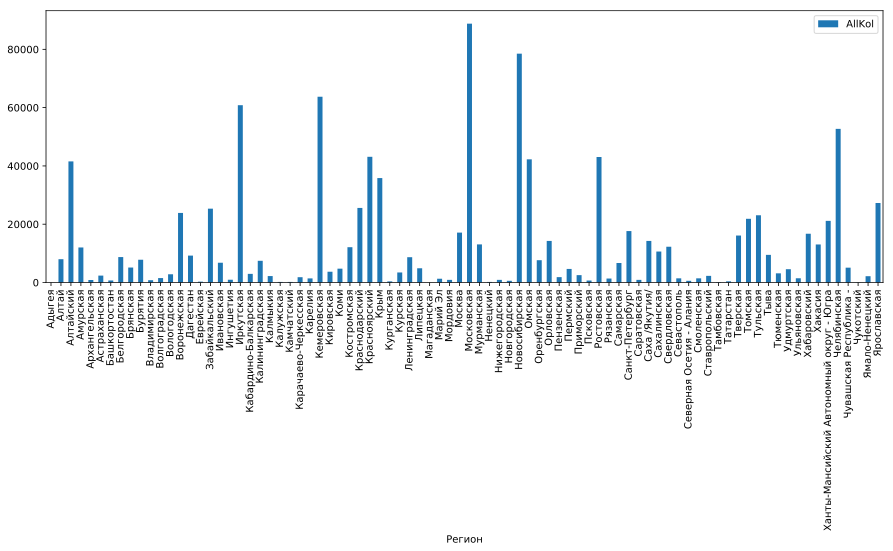

In [27]:
#и выводим его при помощи того же bar char
df1.plot(kind='bar', rot=90)

In [33]:
#Группируем закупки по отраслям
top_otrasl_df = df.groupby('Область')[['ProcKol']].sum()\
    .sort_values('ProcKol', ascending=False).head(10)
    
top_otrasl_df

,ProcKol
Область,
"Средства лекарственные и материалы, применяемые в медицинских целях",71963
Продукты пищевые,33456
Изделия готовые прочие,27418
составной,18998
Работы строительные специализированные,16853
Вещества химические и продукты химические,15310
Сооружения и строительные работы в области гражданского строительства,13548
"Оборудование компьютерное, электронное и оптическое",13490
Кокс и нефтепродукты,9580


In [34]:
#Смотрим самые популярные отрасли закупок. По таблице видно, что лекарства значительно определяют по количеству 
#все остальные отрасли
top_otrasl_df.style.bar()

,ProcKol
Область,
"Средства лекарственные и материалы, применяемые в медицинских целях",71963
Продукты пищевые,33456
Изделия готовые прочие,27418
составной,18998
Работы строительные специализированные,16853
Вещества химические и продукты химические,15310
Сооружения и строительные работы в области гражданского строительства,13548
"Оборудование компьютерное, электронное и оптическое",13490
Кокс и нефтепродукты,9580


In [35]:
#Группируем данные по областям и смотрим количество средств
top_otraslSum_df = df.groupby('Область')[['BlockedGuarantee']].sum()\
    .sort_values('BlockedGuarantee', ascending=False).head(10)
    
top_otraslSum_df

,BlockedGuarantee
Область,
Сооружения и строительные работы в области гражданского строительства,2.527989e+10
Здания и работы по возведению зданий,9.779729e+09
Работы строительные специализированные,4.222604e+09
"Средства лекарственные и материалы, применяемые в медицинских целях",2.362278e+09
составной,2.019261e+09
"Услуги финансовые, кроме услуг по страхованию и пенсионному обеспечению",1.507557e+09
Продукты пищевые,1.371748e+09
Изделия готовые прочие,1.297357e+09
"Оборудование компьютерное, электронное и оптическое",1.140723e+09


In [36]:
#Самой "денежной отраслью" является стройка
top_otraslSum_df.style.bar()

,BlockedGuarantee
Область,
Сооружения и строительные работы в области гражданского строительства,2.52799e+10
Здания и работы по возведению зданий,9.77973e+09
Работы строительные специализированные,4.2226e+09
"Средства лекарственные и материалы, применяемые в медицинских целях",2.36228e+09
составной,2.01926e+09
"Услуги финансовые, кроме услуг по страхованию и пенсионному обеспечению",1.50756e+09
Продукты пищевые,1.37175e+09
Изделия готовые прочие,1.29736e+09
"Оборудование компьютерное, электронное и оптическое",1.14072e+09


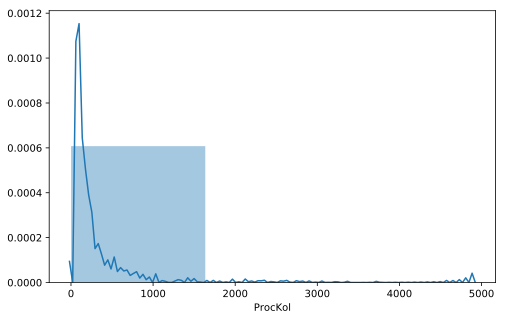

In [82]:
#Построим распределение количества размещенных процедур. Из граффика видно, что большинство регионов размещает небольшое
#количество процедур
%config InlineBackend.figure_format = 'svg' 
sns.distplot(df.ProcKol, bins=3);

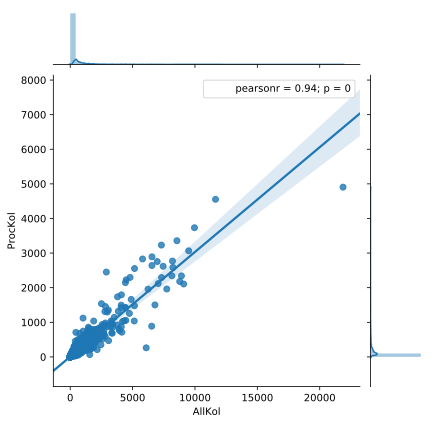

In [81]:
#Построим зависимость количества поданных заявок от количества размещенных процедур
sns.jointplot(x='AllKol', y='ProcKol', 
              data=df, kind='reg');

In [83]:
#Построим распределение размещенных процедур по отраслям и регионам
oblast_region_Kol = df.pivot_table(
                        index='Область', 
                        columns='Регион', 
                        values='ProcKol', 
                        aggfunc=sum).fillna(0).applymap(int)

oblast_region_Kol

Регион,Адыгея,Алтай,Алтайский,Амурская,Архангельская,Астраханская,Башкортостан,Белгородская,Брянская,Бурятия,...,Удмуртская,Ульяновская,Хабаровский,Хакасия,Ханты-Мансийский Автономный округ - Югра,Челябинская,Чувашская Республика -,Чукотский,Ямало-Ненецкий,Ярославская
Область,,,,,,,,,,,,,,,,,,,,,
Бумага и изделия из бумаги,0,86,276,181,17,23,21,109,55,57,...,47,31,60,93,92,360,42,0,7,181
Вещества химические и продукты химические,0,72,363,198,13,17,4,80,217,90,...,152,14,66,255,548,902,12,1,5,615
Вода природная; услуги по очистке воды и водоснабжению,0,8,12,4,2,0,0,3,0,0,...,0,0,14,2,3,8,0,0,1,2
"Древесина и изделия из дерева и пробки, кроме мебели; изделия из соломки и материалов для плетения",0,1,7,9,2,2,0,11,1,2,...,1,0,5,8,4,17,6,0,1,6
Здания и работы по возведению зданий,0,70,206,61,2,0,9,122,2,46,...,7,8,69,25,76,144,30,0,101,45
Изделия готовые прочие,0,225,935,123,69,158,1,84,239,248,...,183,51,261,585,946,1661,136,1,26,872
"Изделия металлические готовые, кроме машин и оборудования",0,22,119,86,6,0,5,37,11,25,...,13,1,31,34,22,96,25,1,7,45
Изделия резиновые и пластмассовые,0,38,217,77,6,8,0,49,61,57,...,70,4,40,94,202,331,21,0,4,237
Изделия табачные,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
#выведем данные в виде heat map ... упс... что-то пошло не так, пока не удалось изменить базовые настройки :(
sns.heatmap(oblast_region_Kol, annot=True, fmt=".0f", 
            linewidths=.5);

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [53]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [55]:
#Отобразим информацию о среднем количестве поданных заявок на одну процедуру по региону, 
#а так же выведем данные о количестве процедур по регионам и количеству поданных заявок
region_Proc_df = df.groupby('Регион')[['ProcKol']].sum()
region_Proc_df.head()

,ProcKol
Регион,
Адыгея,1
Алтай,2801
Алтайский,12958
Амурская,6222
Архангельская,333


In [57]:
zay_col_df = df.groupby('Регион')[['AllKol']].sum()
zay_col_df.head()

,AllKol
Регион,
Адыгея,5
Алтай,8000
Алтайский,41544
Амурская,12024
Архангельская,858


In [59]:
region_df = region_Proc_df.join(zay_col_df)
region_df.head()

,ProcKol,AllKol
Регион,,
Адыгея,1,5
Алтай,2801,8000
Алтайский,12958,41544
Амурская,6222,12024
Архангельская,333,858


In [62]:
region_df.columns = ['ProcKol', 'AllKol']

In [69]:
region_df['SrZay']=region_df.AllKol/region_df.ProcKol

In [73]:
region_df.head()

,ProcKol,AllKol,SrZay
Регион,,,
Адыгея,1,5,5.000000
Алтай,2801,8000,2.856123
Алтайский,12958,41544,3.206050
Амурская,6222,12024,1.932498
Архангельская,333,858,2.576577


In [76]:
trace0 = go.Scatter(
    x=region_df.index,
    y=region_df.SrZay,
    name='Среднее количество')

data = [trace0]
layout = {'title': 'Среднее количество поданных заявок по регионам'}

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [66]:
trace0 = go.Bar(
    x=region_df.index,
    y=region_df.ProcKol,
    name='Количество процедур'
)
trace1 = go.Bar(
    x=region_df.index,
    y=region_df.AllKol,
    name='Количество поданных заявко'
)

data = [trace0, trace1]
layout = {'title': 'Статистика по закупкам на РТС-тендер'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)